# Project El Nino

## Visualization of the dataset

In [6]:
# Import modules
from pathlib import Path
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
plt.rc('font', size=14)

# load the data set with xarray
DATA_DIR = Path('.')
file_sst = 'sst.mnmean.nc'

ds = xr.open_dataset(Path(DATA_DIR, file_sst))
ds


<xarray.Dataset> Size: 123MB
Dimensions:    (time: 475, lat: 180, lon: 360, nbnds: 2)
Coordinates:
  * lat        (lat) float32 720B 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * lon        (lon) float32 1kB 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time       (time) datetime64[ns] 4kB 1981-12-01 1982-01-01 ... 2021-06-01
Dimensions without coordinates: nbnds
Data variables:
    sst        (time, lat, lon) float32 123MB ...
    time_bnds  (time, nbnds) datetime64[ns] 8kB ...
Attributes:
    title:          NOAA Optimum Interpolation (OI) SST V2
    Conventions:    CF-1.0
    history:        Wed Apr  6 13:47:45 2005: ncks -d time,0,278 SAVEs/sst.mn...
    comments:       Data described in  Reynolds, R.W., N.A. Rayner, T.M.\nSmi...
    platform:       Model
    source:         NCEP Climate Modeling Branch
    institution:    National Centers for Environmental Prediction
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    dataset_title:  NOAA Optimum Interpolation (OI) SST V2
    source_url:     http://www.emc.ncep.noaa.gov/research/cmb/sst_analysis/

### first observation

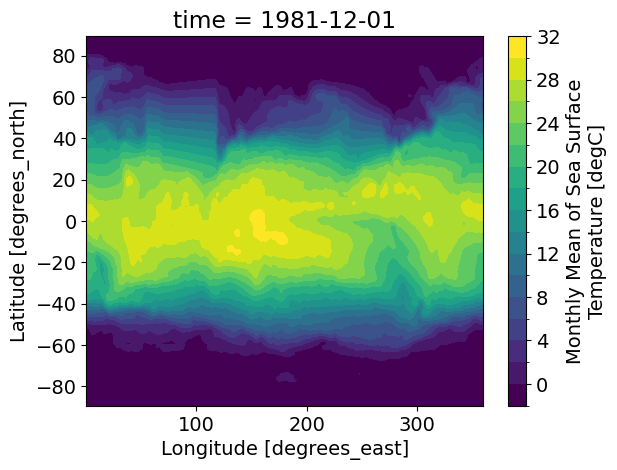

In [17]:
plt.figure()
# the name of the variable is 'sst'
p = ds["sst"].isel(time=0).plot.contourf(levels=20, center=False)


### geographic mean and variance map

Text(0.5, 1.0, 'temporal variance of sst between 1982 and 2011')

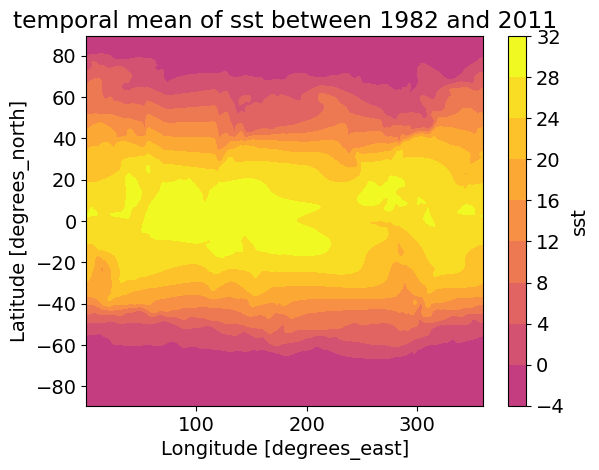

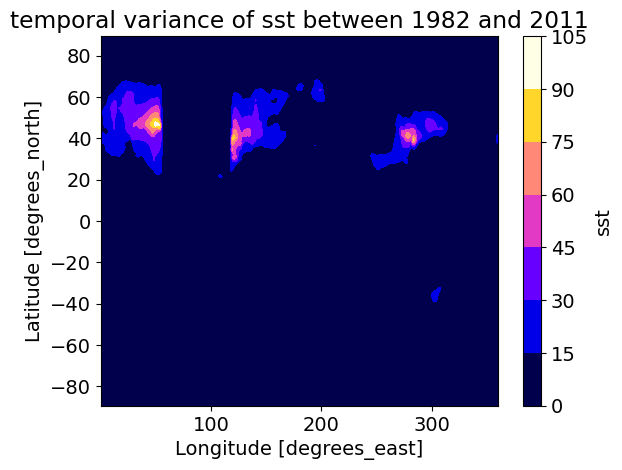

In [36]:
#Compute the temporal mean
ds_mean = ds['sst'].mean('time')
plt.figure()
ds_mean.plot.contourf(cmap='plasma')
plt.title('temporal mean of sst between 1982 and 2011')

#Compute the temporal variance
ds_var = ds['sst'] - ds_mean
ds_var = ds_var.var('time')
plt.figure()
ds_var.plot.contourf(cmap='gnuplot2')
plt.title('temporal variance of sst between 1982 and 2011')
